The purpose of this notebook is to read in and use the data to make figure one. This shows us how many PSMs under a certain cutoff that each tool is finding.

In [1]:
import os
import mokapot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
sys.path
import data_loader as dl

Graphing how many peptides each tool finds at a specific cutoff

In [2]:
#read in the megaScript and reformat it
def clean_meagScript(file):
    df = pd.read_csv(file, low_memory=False,  header=[0,1])
    df.drop(columns = {"Unnamed: 0_level_0"})
    
    
    return df

In [21]:
df = pd.read_csv('MokaPot/MegaScript_2ng_rep1.csv', low_memory=False,  header=[0,1])
df

Unnamed: 0_level_0             ScanNr      MsFragger  \
      Unnamed: 0_level_1 Unnamed: 1_level_1        peptide   
0                      0                  5            NaN   
1                      1                  8            NaN   
2                      2                  9            NaN   
3                      3                 10            NaN   
4                      4                 11            NaN   
...                  ...                ...            ...   
43388              43388               9990  LDDPSCPRPECYR   
43389              43389               9991       SDPVVSYR   
43390              43390               9992      DTQEVPLEK   
43391              43391               9994       RLEFENQK   
43392              43392               9999      LGVTANDVK   

                                                                     \
      Updated_probability mokapot score mokapot q-value mokapot PEP   
0                     NaN           NaN             NaN         NaN   
1                     NaN           NaN             NaN         NaN   
2                     NaN           NaN             NaN         NaN   
3                     NaN           NaN             NaN         NaN   
4                     NaN           NaN             NaN         NaN   
...                   ...           ...             ...         ...   
43388              0.0000           NaN             NaN         NaN   
43389              0.0024           NaN             NaN         NaN   
43390              0.0022           NaN             NaN         NaN   
43391              0.3401           NaN             NaN         NaN   
43392              0.0003           NaN             NaN         NaN   

                            MsgfPlus                          ...  \
                             peptide    QValue mokapot score  ...   
0      QSKSEHETSDAKKSVEDRGKRCPTPEIQK  0.086185     -0.370711  ...   
1          CTMAPFWAHSDPEEM+15.995QWR  0.307555     -1.293641  ...   
2                                NaN       NaN           NaN  ...   
3                                NaN       NaN           NaN  ...   
4                   RTEDCGHCDFCRDMKK  0.303415     -1.323624  ...   
...                              ...       ...           ...  ...   
43388                            NaN       NaN           NaN  ...   
43389                            NaN       NaN           NaN  ...   
43390                            NaN       NaN           NaN  ...   
43391                            NaN       NaN           NaN  ...   
43392                            NaN       NaN           NaN  ...   

      MetaMorpheus                                                \
            QValue PEP mokapot score mokapot q-value mokapot PEP   
0              NaN NaN           NaN             NaN         NaN   
1              NaN NaN           NaN             NaN         NaN   
2              NaN NaN           NaN             NaN         NaN   
3              NaN NaN           NaN             NaN         NaN   
4              NaN NaN           NaN             NaN         NaN   
...            ...  ..           ...             ...         ...   
43388          NaN NaN           NaN             NaN         NaN   
43389          NaN NaN           NaN             NaN         NaN   
43390          NaN NaN           NaN             NaN         NaN   
43391          NaN NaN           NaN             NaN         NaN   
43392          NaN NaN           NaN             NaN         NaN   

                         MaxQuant                                          \
                          peptide       PEP mokapot score mokapot q-value   
0            SSKAYYVLSDAAMSLQKYGR  3.245179          -1.0        0.246129   
1                             NaN       NaN           NaN             NaN   
2      NVYAEVLHFQSM+15.995CSCLWYK  0.121158          -1.0        0.246129   
3                             NaN       NaN          -1.0        0.246129   
4       SANGM+15.995LMNMMMMSDE

Slicing out the Peptide Prophet Probability values for MsFragger. There is no qvalue or PEP, so this is the row we are using. 
Counting how many are at or under the cutoff

In [22]:
def get_msf_prob_len(df):
    msf_probability = df["MsFragger"]['Updated_probability']
    msf_probability =  msf_probability.dropna()
    msf_under_cutoff = len(msf_probability.loc[msf_probability <= 0.01])
    return msf_under_cutoff

Slicing out the qvalues from MetaMorpheus Counting how many are at or under the cutoff

In [23]:
def get_mm_Qval_len(df):
    mm_qval = df["MetaMorpheus"]["QValue"] 
    mm_qval =  mm_qval.dropna() 
    mm_under_cutoff = len(mm_qval.loc[mm_qval <= 0.01])
    #print(mm_qval.loc[mm_qval <= 0.01])
    return mm_under_cutoff

Slicing out the PEP values from MetaMorpheus Counting how many are at or under the cutoff

In [25]:
def get_mm_PEP_len(df):
    mm_PEP = df["MetaMorpheus"]["PEP"] 
    mm_PEP =  mm_PEP.dropna() 
    value_under_cutoff = len(mm_PEP.loc[mm_PEP <= 0.01])
    #print(mm_PEP.loc[mm_PEP <= 0.01])
    return value_under_cutoff

Slicing out the qvalues from MsgfPlus Counting how many are at or under the cutoff

In [27]:
def get_msg_Qval_len(df):
    msg_qval = df["MsgfPlus"]["QValue"] 
    msg_qval =  msg_qval.dropna() 
    msg_under_cutoff = len(msg_qval.loc[msg_qval <= 0.01])
    #print(msg_qval.loc[msg_qval <= 0.01])
    return msg_under_cutoff

Slicing out the PEP from MaxQuant. Counting how many are at or under the cutoff

In [2]:
def get_mq_PEP_len(df):
    mq_PEP = df["MaxQuant"]["PEP"] 
    mq_PEP =  mq_PEP.dropna() 
    mq_under_cutoff = len(mq_PEP.loc[mq_PEP <= 0.01])
    #print(mq_PEP.loc[mq_PEP <= 0.01])
    return mq_under_cutoff

This function gets the number of scan values that were at or below the cutoff for each tool and returns them. 

In [1]:
def get_file_values(file):
    df = clean_meagScript(file)
    msf = get_msf_prob_len(df)
    MM_QVal = get_mm_Qval_len(df)
    MM_PEP = get_mm_PEP_len(df)
    msg_QVal = get_msg_Qval_len(df)
    MQ_PEP = get_mq_PEP_len(df)
    values_list = {"msf" : msf, "MM_QVal" : MM_QVal, "MM_PEP" : MM_PEP, "msg_QVal" : msg_QVal, "MQ_PEP" : MQ_PEP}
    return values_list


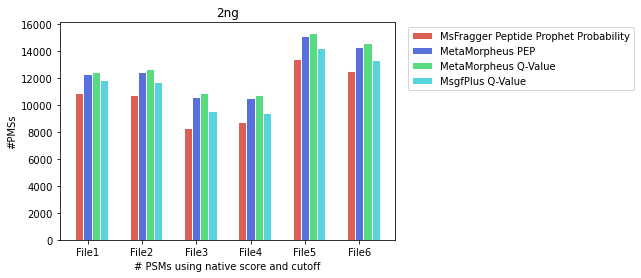

In [17]:
File1 = get_file_values("MokaPot/MegaScript_2ng_rep1.csv")
File2 = get_file_values("MokaPot/MegaScript_2ng_rep2.csv")
File3 = get_file_values("MokaPot/MegaScript_2ng_rep3.csv")
File4 = get_file_values("MokaPot/MegaScript_2ng_rep4.csv")
File5 = get_file_values("MokaPot/MegaScript_2ng_rep5.csv")
File6 = get_file_values("MokaPot/MegaScript_2ng_rep6.csv")

 
# set width of bars
barWidth = 0.15
 
# set heights of bars
msf_prob = [File1['msf'], File2['msf'], File3['msf'], File4['msf'], File5['msf'], File6['msf']]
MM_PEP = [File1['MM_PEP'], File2['MM_PEP'], File3['MM_PEP'], File4['MM_PEP'], File5['MM_PEP'], File6['MM_PEP']]
MM_qval = [File1['MM_QVal'], File2['MM_QVal'], File3['MM_QVal'], File4['MM_QVal'], File5['MM_QVal'], File6['MM_QVal']]
msg_qval = [File1['msg_QVal'], File2['msg_QVal'], File3['msg_QVal'], File4['msg_QVal'], File5['msg_QVal'], File6['msg_QVal']]
#mq_PEP = [File1['MQ_PEP'], File2['MQ_PEP'], File3['MQ_PEP'], File4['MQ_PEP'], File5['MQ_PEP'], File6['MQ_PEP']]
 
# Set position of bar on X axis
r1 = np.arange(len(msf_prob))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
#r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, msf_prob, color='#db5f57', width=barWidth, edgecolor='white', label='MsFragger Peptide Prophet Probability')
plt.bar(r2, MM_PEP, color='#5770db', width=barWidth, edgecolor='white', label='MetaMorpheus PEP')
plt.bar(r3, MM_qval, color='#57db80', width=barWidth, edgecolor='white', label='MetaMorpheus Q-Value')
plt.bar(r4, msg_qval, color='#57d3db', width=barWidth, edgecolor='white', label='MsgfPlus Q-Value')
#plt.bar(r5, mq_PEP, color='#a157db', width=barWidth, edgecolor='white', label='MaxQuant PEP')
 
# Add xticks on the middle of the group bars
plt.ylabel('#PMSs')
plt.xlabel('# PSMs using native score and cutoff')
plt.title('2ng')
plt.xticks([r + barWidth for r in range(len(msf_prob))], ['File1', 'File2', 'File3', 'File4', 'File5', 'File6'])
 
# Create legend & Show graphic
plt.legend(loc = "upper right", bbox_to_anchor=(1.73, 1))
plt.show()

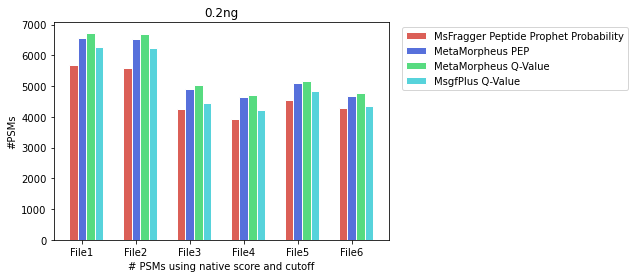

In [20]:
File1 = get_file_values("MokaPot/MegaScript_0.2ng_rep1.csv")
File2 = get_file_values("MokaPot/MegaScript_0.2ng_rep2.csv")
File3 = get_file_values("MokaPot/MegaScript_0.2ng_rep3.csv")
File4 = get_file_values("MokaPot/MegaScript_0.2ng_rep4.csv")
File5 = get_file_values("MokaPot/MegaScript_0.2ng_rep5.csv")
File6 = get_file_values("MokaPot/MegaScript_0.2ng_rep6.csv")

 
# set width of bars
barWidth = 0.16
 
# set heights of bars
msf_prob = [File1['msf'], File2['msf'], File3['msf'], File4['msf'], File5['msf'], File6['msf']]
MM_PEP = [File1['MM_PEP'], File2['MM_PEP'], File3['MM_PEP'], File4['MM_PEP'], File5['MM_PEP'], File6['MM_PEP']]
MM_qval = [File1['MM_QVal'], File2['MM_QVal'], File3['MM_QVal'], File4['MM_QVal'], File5['MM_QVal'], File6['MM_QVal']]
msg_qval = [File1['msg_QVal'], File2['msg_QVal'], File3['msg_QVal'], File4['msg_QVal'], File5['msg_QVal'], File6['msg_QVal']]
mq_PEP = [File1['MQ_PEP'], File2['MQ_PEP'], File3['MQ_PEP'], File4['MQ_PEP'], File5['MQ_PEP'], File6['MQ_PEP']]
 
# Set position of bar on X axis
r1 = np.arange(len(msf_prob))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, msf_prob, color='#db5f57', width=barWidth, edgecolor='white', label='MsFragger Peptide Prophet Probability')
plt.bar(r2, MM_PEP, color='#5770db', width=barWidth, edgecolor='white', label='MetaMorpheus PEP')
plt.bar(r3, MM_qval, color='#57db80', width=barWidth, edgecolor='white', label='MetaMorpheus Q-Value')
plt.bar(r4, msg_qval, color='#57d3db', width=barWidth, edgecolor='white', label='MsgfPlus Q-Value')
#plt.bar(r5, mq_PEP, color='#a157db', width=barWidth, edgecolor='white', label='MaxQuant PEP')
 
# Add xticks on the middle of the group bars
plt.ylabel('#PSMs')
plt.xlabel('# PSMs using native score and cutoff')
plt.title('0.2ng')
plt.xticks([r + barWidth for r in range(len(msf_prob))], ['File1', 'File2', 'File3', 'File4', 'File5', 'File6'])
 
# Create legend & Show graphic
plt.legend(loc = "upper right", bbox_to_anchor=(1.73, 1))


 
plt.show()

In [12]:
import seaborn as sns
pal = sns.color_palette("hls", 8)
pal.as_hex()

['#db5f57',
 '#dbc257',
 '#91db57',
 '#57db80',
 '#57d3db',
 '#5770db',
 '#a157db',
 '#db57b2']